In [3]:
#!pip install yfinance

In [4]:
import yfinance as yf
data = yf.download("AMZN", period="1y")

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800
2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000
2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000
2022-12-15,89.889999,89.970001,87.470001,88.449997,88.449997,84802900
2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146144100
...,...,...,...,...,...,...
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400
2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000
2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800


In [6]:
df = data['Close']
df

Date
2022-12-12     90.550003
2022-12-13     92.489998
2022-12-14     91.580002
2022-12-15     88.449997
2022-12-16     87.860001
                 ...    
2023-12-05    146.880005
2023-12-06    144.520004
2023-12-07    146.880005
2023-12-08    147.419998
2023-12-11    144.516006
Name: Close, Length: 251, dtype: float64

Text(0.5, 1.0, 'Trend of Closing Price')

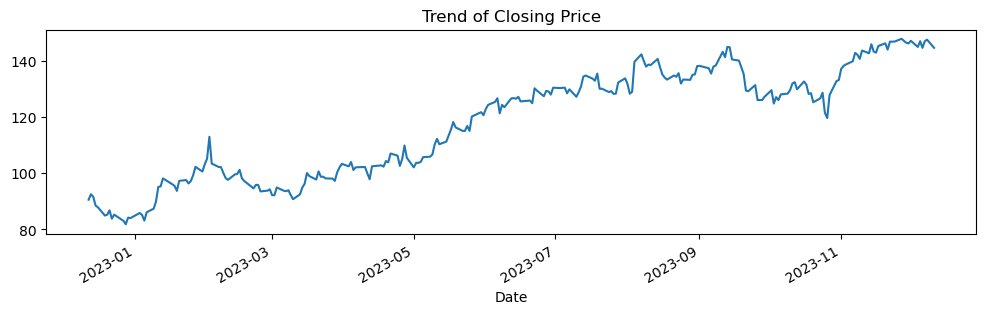

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
df.plot(linewidth = 1.5)
plt.title("Trend of Closing Price")

In [8]:
df1 = df.reset_index()
df1

,Date,Close
0,2022-12-12,90.550003
1,2022-12-13,92.489998
2,2022-12-14,91.580002
3,2022-12-15,88.449997
4,2022-12-16,87.860001
...,...,...
246,2023-12-05,146.880005
247,2023-12-06,144.520004
248,2023-12-07,146.880005
249,2023-12-08,147.419998


In [9]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [10]:
#df1['Date'] = pd.to_datetime(df1['Date'])  #### This is the way of conversion of your datetime object
df1['Day'] = df1['Date'].dt.day

In [11]:
df1['Month'] = df1['Date'].dt.month
df1['Weekday'] = df1['Date'].dt.day_name()

In [12]:
df1

,Date,Close,Day,Month,Weekday
0,2022-12-12,90.550003,12,12,Monday
1,2022-12-13,92.489998,13,12,Tuesday
2,2022-12-14,91.580002,14,12,Wednesday
3,2022-12-15,88.449997,15,12,Thursday
4,2022-12-16,87.860001,16,12,Friday
...,...,...,...,...,...
246,2023-12-05,146.880005,5,12,Tuesday
247,2023-12-06,144.520004,6,12,Wednesday
248,2023-12-07,146.880005,7,12,Thursday
249,2023-12-08,147.419998,8,12,Friday


<Axes: xlabel='Day'>

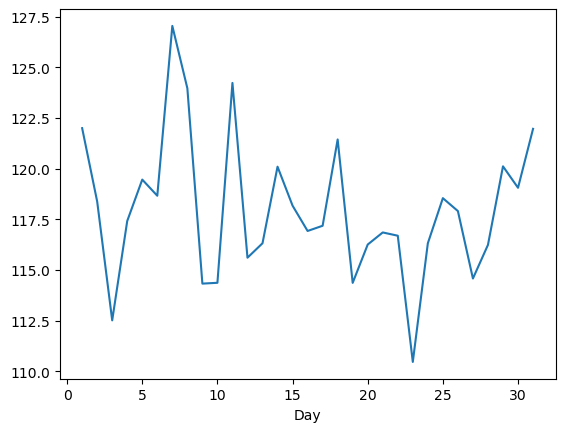

In [13]:
df1.groupby("Day")["Close"].mean().plot()

<Axes: xlabel='Date'>

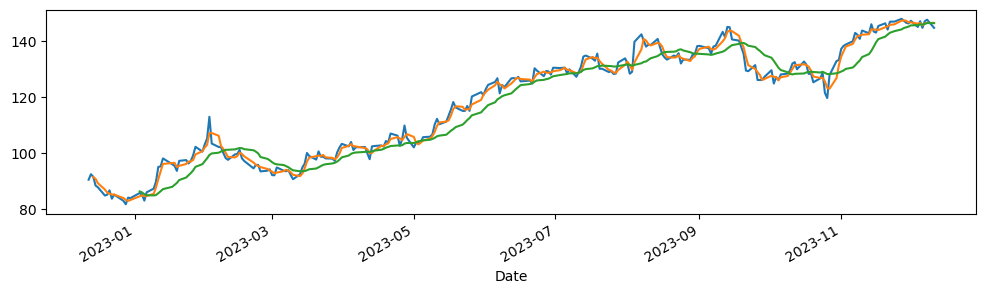

In [14]:
### Simple Moving average (3days,15days)
plt.figure(figsize=(12,3))
df.plot()
df.rolling(3).mean().plot()
df.rolling(15).mean().plot()

In [15]:
df1.Close.rolling(3).mean()

0             NaN
1             NaN
2       91.540001
3       90.839999
4       89.296666
          ...    
246    146.250000
247    145.413335
248    146.093338
249    146.273336
250    146.272003
Name: Close, Length: 251, dtype: float64

In [16]:
# Arima - Forcating time series data
# Exponential Smoothing
# simple smoothing
# weighted average(rolling average)

<Axes: xlabel='Date'>

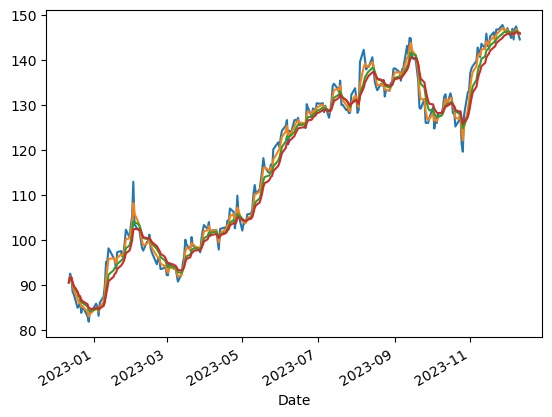

In [17]:
# Exponential moving average(ewn)
df.plot()
df.ewm(span=3).mean().plot()    ### number of rowsto compare
df.ewm(span=7).mean().plot()
df.ewm(span=10).mean().plot()

ARIMA = Auto regressive Integrated moving average
#### stationary - A stationary timeseries data is one whose properties
#### do not depend on time. That is why time series with trends ,seasonality are not stationary data
#### stationary timeseries will have no predictable patterns in the longterm

In [18]:
# An arima model is a class of statistical model for analysing and forecasting of data
# It is very powerful and very simple to utilize

In [19]:
### ARIMA
### p,d,q
# p the number of lag observations included in the model also called as lag orde.
# d The number of times the raw observations are differenced also called the degree of differance.
# q The size of the moving average window,also called as moving average 

In [20]:
df

Date
2022-12-12     90.550003
2022-12-13     92.489998
2022-12-14     91.580002
2022-12-15     88.449997
2022-12-16     87.860001
                 ...    
2023-12-05    146.880005
2023-12-06    144.520004
2023-12-07    146.880005
2023-12-08    147.419998
2023-12-11    144.516006
Name: Close, Length: 251, dtype: float64

In [21]:
### to check wheather the data is stationary or not  - we use adfuller data

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
test_result = adfuller(df)
test_result

(-0.8211344091571451,
 0.8128350347299386,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 1092.2961339419762)

In [24]:
df1 = df1[['Date',"Close"]]

In [25]:
df1["Close_first_diff"] = df1["Close"] - df1["Close"].shift(1)

C:\Users\admin\AppData\Local\Temp\ipykernel_6304\2055797231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Close_first_diff"] = df1["Close"] - df1["Close"].shift(1)


In [26]:
df1["Seasonal_first_diff"] = df1["Close"] - df1["Close"].shift(12)

C:\Users\admin\AppData\Local\Temp\ipykernel_6304\1172035403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Seasonal_first_diff"] = df1["Close"] - df1["Close"].shift(12)


In [27]:
df1

,Date,Close,Close_first_diff,Seasonal_first_diff
0,2022-12-12,90.550003,NaN,NaN
1,2022-12-13,92.489998,1.939995,NaN
2,2022-12-14,91.580002,-0.909996,NaN
3,2022-12-15,88.449997,-3.130005,NaN
4,2022-12-16,87.860001,-0.589996,NaN
...,...,...,...,...
246,2023-12-05,146.880005,2.040009,4.050003
247,2023-12-06,144.520004,-2.360001,-0.659988
248,2023-12-07,146.880005,2.360001,0.750000
249,2023-12-08,147.419998,0.539993,3.520004


In [28]:
test_result = adfuller(df1["Close_first_diff"].dropna())
test_result

(-12.786663279222868,
 7.222283597147339e-24,
 1,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 1088.045633682023)

<Axes: >

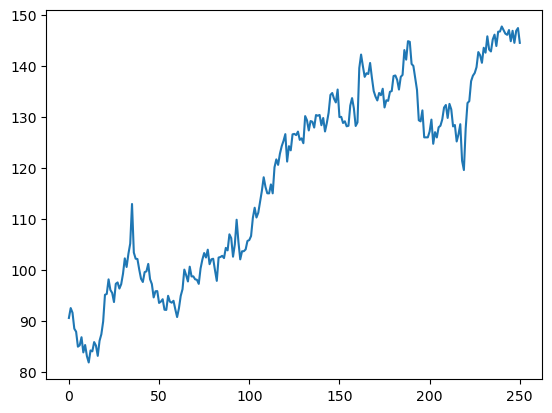

In [29]:
df1['Close'].plot()

<Axes: >

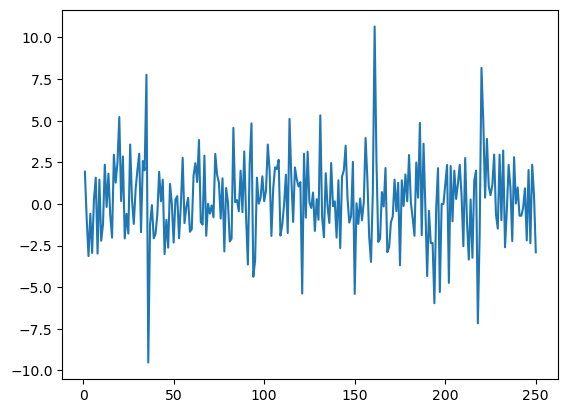

In [30]:
df1['Close_first_diff'].plot()

In [31]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

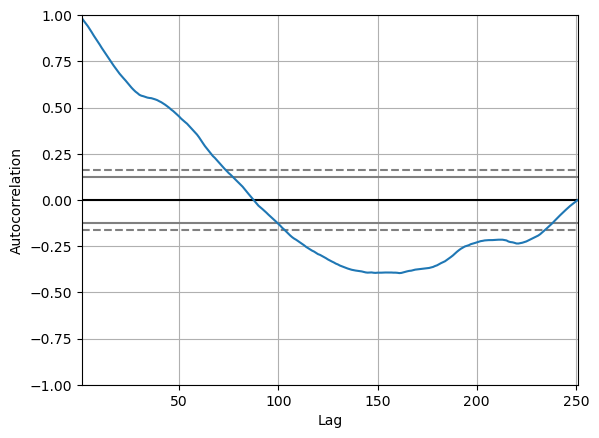

In [32]:
autocorrelation_plot(df1['Close'])

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

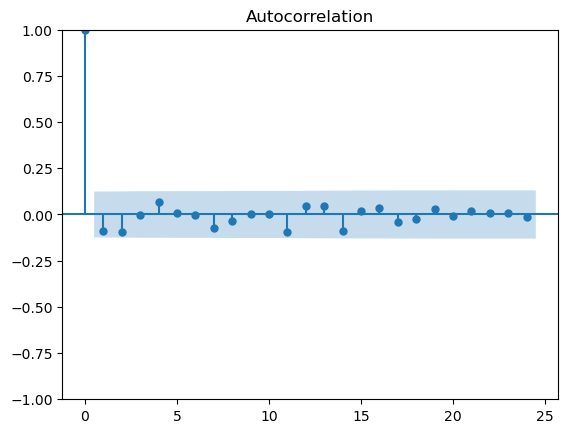

In [34]:
plot_acf(df1['Close_first_diff'].dropna())  #### p = 1
plt.show()

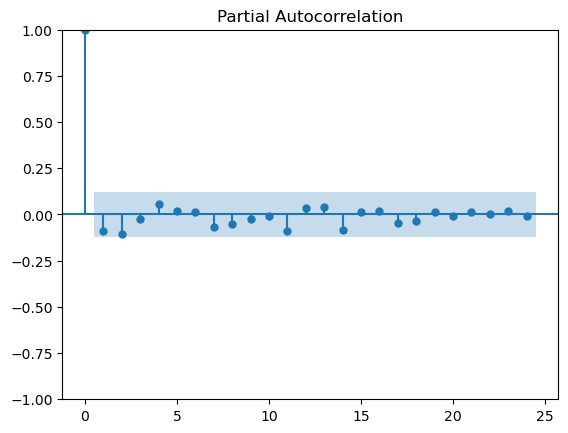

In [35]:
plot_pacf(df1['Close_first_diff'].dropna())  #### q = 1
plt.show()

In [37]:
df1['Close']

0       90.550003
1       92.489998
2       91.580002
3       88.449997
4       87.860001
          ...    
246    146.880005
247    144.520004
248    146.880005
249    147.419998
250    144.516006
Name: Close, Length: 251, dtype: float64

In [40]:
### order = p,d,q (1,1,1)
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(df1['Close'],order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -579.485
Date:                Mon, 11 Dec 2023   AIC                           1164.969
Time:                        21:07:06   BIC                           1175.534
Sample:                             0   HQIC                          1169.221
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3169      0.477      0.665      0.506      -0.617       1.251
ma.L1         -0.4177      0.457     -0.915      0.360      -1.312       0.477
sigma2         6.0372      0.405     14.893      0.000       5.243       6.832
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.70
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.16
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

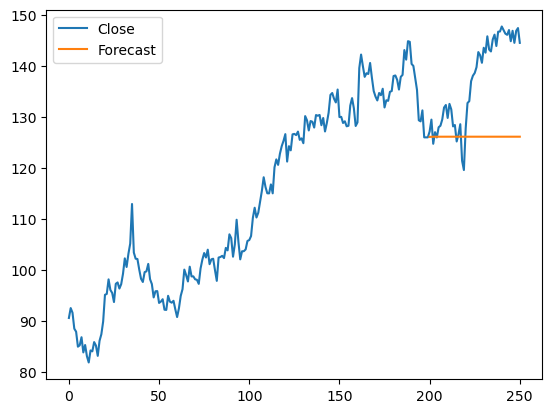

In [41]:
df1['Forecast'] = model_fit.predict(start = 200,end = 250,dynamic = True)
df1[["Close","Forecast"]].plot()

In [42]:
df1["Forecast"]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
246    126.108069
247    126.108069
248    126.108069
249    126.108069
250    126.108069
Name: Forecast, Length: 251, dtype: float64

In [44]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df1['Close'],order = (1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()
print(results)

<Axes: >

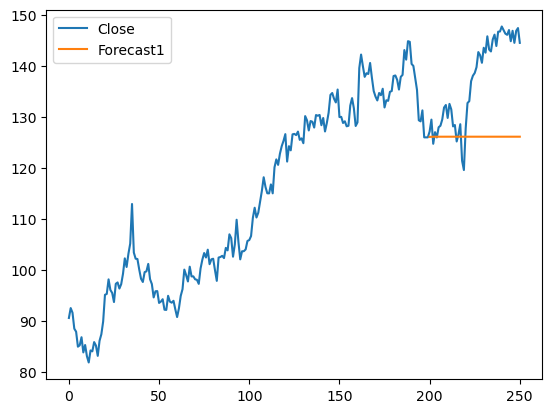

In [45]:
df1['Forecast1'] = model_fit.predict(start = 200,end = 250,dynamic = True)
df1[["Close","Forecast1"]].plot()

In [46]:
import pandas as pd
dd = pd.DataFrame(pd.date_range('2023-12-05','2023-12-08'),columns = ['Date'])
dd['Close_forecaast'] = np.nan

NameError: name 'np' is not defined

In [ ]:
dd.set_index('Date',inplace=True)

In [ ]:
st = dd['Date'][0]
st

In [ ]:
en = dd['Date'][3]
en

In [ ]:
df1['Forecast1'] = model_fit.predict(start = 0,end = 3,dynamic = True)

In [ ]:
#### f,google